In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
ccdata=pd.read_csv("D:/analytics/Financial_Analytics/creditcard.csv")

In [26]:
ccdata.shape

(284807, 31)

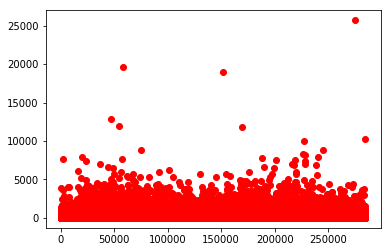

In [27]:
plt.plot(ccdata.Amount,'ro')

In [28]:
ccdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
ccdata.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [30]:
y=ccdata.Class
X=ccdata.drop(['Class','Time'],axis=1)

In [8]:
from sklearn.neighbors import KNeighborsClassifier   #KNN Classifier

In [9]:
knn=KNeighborsClassifier(n_neighbors=5)

In [10]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
knn.score(X,y)

0.99941012685783703

In [12]:
knn.kneighbors_graph(X)    #graph

<284807x284807 sparse matrix of type '<class 'numpy.float64'>'
	with 1424035 stored elements in Compressed Sparse Row format>

In [13]:
knnpredict=knn.predict(X)

In [14]:
from sklearn.metrics import classification_report    #to import classification report

In [15]:
print(classification_report(knnpredict,y))  #precision value- fraud detection 70% of frauds detected properly hence knn have problem building model

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284441
          1       0.70      0.94      0.80       366

avg / total       1.00      1.00      1.00    284807



In [16]:
# in anamoly detection precision score is more important

In [17]:
pd.crosstab(knnpredict,y)

Class,0,1
row_0,,
0,284294,147
1,21,345


In [31]:
from sklearn.linear_model import LogisticRegression

In [34]:
Logreg=LogisticRegression()

In [35]:
Logregmodel=Logreg.fit(X,y)

In [36]:
Logregmodel.score(X,y)

0.99920296902814887

In [37]:
logregpredict=Logregmodel.predict(X)

In [38]:
print(classification_report(logregpredict,y)) #precision is 62%, hence it is bad than knn

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    284458
          1       0.62      0.88      0.73       349

avg / total       1.00      1.00      1.00    284807



In [41]:
from sklearn.cluster import KMeans   #kmeans

In [48]:
cluster_range = range(1,20)  #check for ranges by changing values we need to straighten the line elbow plot, the point where elbow forms
cluster_errors=[]

for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(X)
    cluster_errors.append(clusters.inertia_)

In [49]:
clusters_df=pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})

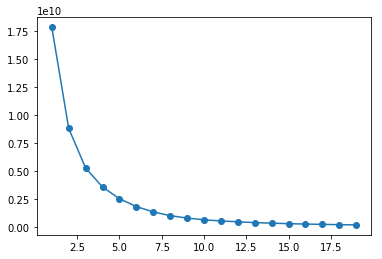

In [50]:
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker="o") #for 5t/6th/8thpoint graph is becoming straight

In [51]:
clustfinal=KMeans(8)

In [52]:
clustermodel=clustfinal.fit(X)

In [53]:
clusterpredict=clustermodel.predict(X)

In [54]:
print(classification_report(clusterpredict,y))

             precision    recall  f1-score   support

          0       0.80      1.00      0.89    229063
          1       0.03      0.00      0.01      3690
          2       0.00      0.00      0.00       303
          3       0.00      0.00      0.00         3
          4       0.00      0.00      0.00     39475
          5       0.00      0.00      0.00     11104
          6       0.00      0.00      0.00      1129
          7       0.00      0.00      0.00        40

avg / total       0.65      0.80      0.72    284807



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
Rf=RandomForestClassifier(n_estimators=1000)

In [58]:
Rfmodel=Rf.fit(X,y)